Vertices: ['A', 'B', 'C', 'D', 'E', 'F']
Edges: [('A', 'B', 2.0), ('A', 'C', 3.0), ('A', 'D', 9.0), ('A', 'E', 4.0), ('B', 'C', 5.0), ('C', 'D', 6.0), ('E', 'F', 3.0)]


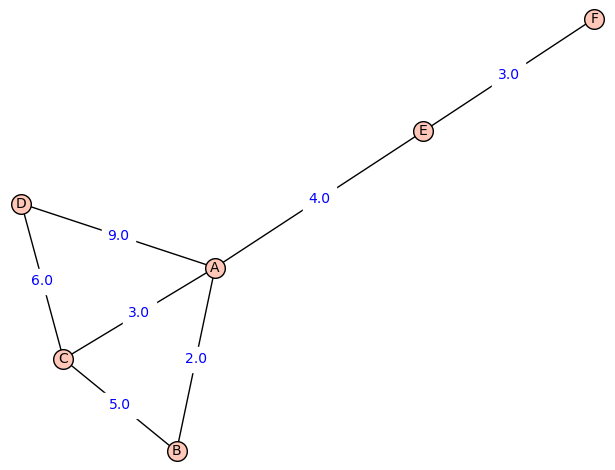

In [2]:
# Using boolean to perform set operations
# The sets

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import csv

def graph_from_csv(data):
    """
    Reads an edge list from a CSV called data file and creates a SageMath graph.
    Assumes the CSV has 'source', 'target', and optionally 'weight' columns.
    """
    graph = Graph(weighted=True)
    edges = []

    # Open and read the CSV file
    with open(data, 'r') as dataFile:
        reader = csv.reader(dataFile)

        next(reader, None) # Skips the header row if it exists 

        for row in reader:
            if len(row) >= 2:
                # Vertices will be created automatically if they don't exist
                source_vertex = row[0].strip() # Removes white spaces, etc.
                target_vertex = row[1].strip()

                # Adding in weights (optional)
                if len(row) >= 3:
                    try:
                        weight = float(row[2].strip())
                        edges.append((source_vertex, target_vertex, weight))
                    except ValueError:
                        # Handle cases where the weight is not a valid number
                        edges.append((source_vertex, target_vertex))
                else:
                    edges.append((source_vertex, target_vertex))

    # Add all edges to the graph
    graph.add_edges(edges)
    return graph

# Replace 'edges.csv' with the actual path/name of your file
g = graph_from_csv('graph_data.csv')

print("Vertices:", g.vertices())
print("Edges:", g.edges())
g.plot(edge_labels=True)

In [6]:
# Test connectivity

g.is_connected()

# Say we want to find a shortest path between two vertices

start_v = "A"
end_v = "F"

# Find a shortest path between vertices above
s_path = g.shortest_path(start_v, end_v)
print(f"A shortest path from {start_v} to {end_v}: {s_path}")

length_1_4 = g.shortest_path_length(start_v, end_v, by_weight=True)
print(f"Shortest path length from 1 to 4: {length_1_4}")

True

A shortest path from A to F: ['A', 'E', 'F']
Shortest path length from 1 to 4: 7


In [8]:
# Getting all the distances between pairs  of veices

dist_matrix = g.shortest_path_all_pairs(by_weight=True)
print(dist_matrix)

({'A': {'A': 0.0, 'B': 2.0, 'C': 3.0, 'D': 9.0, 'E': 4.0, 'F': 7.0}, 'B': {'A': 2.0, 'B': 0.0, 'C': 5.0, 'D': 11.0, 'E': 6.0, 'F': 9.0}, 'C': {'A': 3.0, 'B': 5.0, 'C': 0.0, 'D': 6.0, 'E': 7.0, 'F': 10.0}, 'D': {'A': 9.0, 'B': 11.0, 'C': 6.0, 'D': 0.0, 'E': 13.0, 'F': 16.0}, 'E': {'A': 4.0, 'B': 6.0, 'C': 7.0, 'D': 13.0, 'E': 0.0, 'F': 3.0}, 'F': {'A': 7.0, 'B': 9.0, 'C': 10.0, 'D': 16.0, 'E': 3.0, 'F': 0.0}}, {'A': {'A': None, 'B': 'A', 'C': 'A', 'D': 'A', 'E': 'A', 'F': 'E'}, 'B': {'A': 'B', 'B': None, 'C': 'B', 'D': 'A', 'E': 'A', 'F': 'E'}, 'C': {'A': 'C', 'B': 'C', 'C': None, 'D': 'C', 'E': 'A', 'F': 'E'}, 'D': {'A': 'D', 'B': 'C', 'C': 'D', 'D': None, 'E': 'A', 'F': 'E'}, 'E': {'A': 'E', 'B': 'A', 'C': 'A', 'D': 'A', 'E': None, 'F': 'E'}, 'F': {'A': 'E', 'B': 'A', 'C': 'A', 'D': 'A', 'E': 'F', 'F': None}})
